# Cadenas de Markov 

Un caminante aleatorio es un tipo particular de una *cadena de Markov*.

Una cadena de Markov es, a su vez, un tipo de 
*proceso estocástico*, es decir una evolución en 
el tiempo que no es determinista, sino donde hay 
una probabilidad dada, el sistema lleva a cabo 
una *transición* hacia un estado nuevo. Las cadenas de Markov son de gran importancia hoy día en las ciencias.

La particularidad de las cadenas de Markov es que satisfacen la *propiedad de Markov*: el estado nuevo depende *sólo de un estado anterior*. Se suele decir que el proceso *no tiene memoria*.

Por ejemplo, una caminata aleatoria satisface esto, ya que la posición al tiempo $t+1$ depende sólo de la posición al tiempo $t$ (no de posiciones a tiempos anteriores).  

Sea $X_n$ el estado del proceso al tiempo $n$. Nos interesaremos por el momento en procesos de Markov tal que
$P(X_{n+1} = j \, | \, X_n = i) = p_{ij}$, independiente del tiempo. La notación aquí es de una *probabilidad condicional*, es decir, la probabilidad de que el sistema está en el estado $j$ al tiempo $n+1$, *dado que* estaba en el estado $i$ al tiempo $n$.

[1] Las $p_{ij}$ forman una matriz. 

(i) Escribe la matriz para un caminante aleatorio con fronteras reflejantes en 0 y $L=5$, si tiene probabilidades $p$, $q$, y $r$ de brincar a la derecha o izquierda, o de permanecer en el mismo lugar, respectivamente.

$P_{i,j}=\begin{pmatrix}
  r+q & q & 0 & 0 & 0 \\
  p & r & q & 0 & 0 \\
  0 & p & r & q & 0 \\
  0 & 0 & p & r & q \\
  0 & 0 & 0 & p & r+p \\
 \end{pmatrix}$

(ii) ¿Qué propiedad debe satisfacer cualquier matriz de transición?

Las columnas deben de sumar uno, ya que estas representan las probabilidades de saltar a la derecha, izquierda, o quedarse en el mismo sitio para cada lugar del sistema, y estas suman 1.


[2] Considera una cadena que tiene 4 estados. Desde cada estado puede brincar a cada otro estado con igual probabilidad. 

(i) Escribe la matriz de transición $\mathsf{P} = (p_{ij})$. ¿Qué propiedades tiene que satisfacer?

$P_{i,j}=\frac{1}{3}\begin{pmatrix}
  0 & 1 & 1 & 1 \\
  1 & 0 & 1 & 1 \\
  1 & 1 & 0 & 1 \\
  1 & 1 & 1 & 0 \\
 \end{pmatrix}$
 

 Generalizando para $n$ estados, la probbilidad de saltar a otro es $1/(n-1)$
 
$P_{i,j}=\frac{1}{n-1}\begin{pmatrix}
  0 & \cdots & 1 \\
  \vdots & \ddots &\vdots \\
  1 & \cdots & 0 \\
 \end{pmatrix}$
 
 Estas matrices satisfacen que cada columan sume 1, al igual que cada fila.
 
 Si pueden "brincar" o permanecer en el mismo sitio:
 
 $P_{i,j}=\frac{1}{4}\begin{pmatrix}
  1 & 1 & 1 & 1 \\
  1 & 1 & 1 & 1 \\
  1 & 1 & 1 & 1 \\
  1 & 1 & 1 & 1 \\
 \end{pmatrix}$
 
(ii) ¿Qué tipo de propiedades nos podrían interesar?, suponiendo que esto modela un estado físico, químico o biológico que puede estar en uno de estos estados.

(iii) Simula la dinámica del sistema: escribe una función que genera una realización de cierta longitud.

In [2]:
using PyPlot

In [1]:
using SymPy
using PyCall


In [38]:
function equal_probability(n_states,time,i_x,bool_plot=true)
    prob=1./(n_states-1)
    matrix=zeros(n_states,n_states)
    vector=zeros(n_states)
    vector[i_x]=1
    for i in 1:n_states
        for j in 1:n_states
            if i == j
                matrix[i,j]=0
            else
                matrix[i,j]=1.
            end
        end
    end
    for t in 1:time
        vector=prob*matrix*vector
        if bool_plot==true
            plot(vector)
            ylim(0,prob*(1+0.1))
        end
    end
    return vector
end

equal_probability (generic function with 2 methods)

In [183]:
function equal_probability2(i_state,time,bool_plot=true)
    n_states=length(i_state)
    prob=1./(n_states-1)
    matrix=zeros(n_states,n_states)
    for i in 1:n_states
        for j in 1:n_states
            if i == j
                matrix[i,j]=0
            else
                matrix[i,j]=1.
            end
        end
    end
    for t in 1:time
        i_state=prob*matrix*i_state
        if bool_plot==true
            plot(i_state)
            ylim(0,prob*(1+0.2))
        end
    end
    return i_state
end

equal_probability2 (generic function with 2 methods)

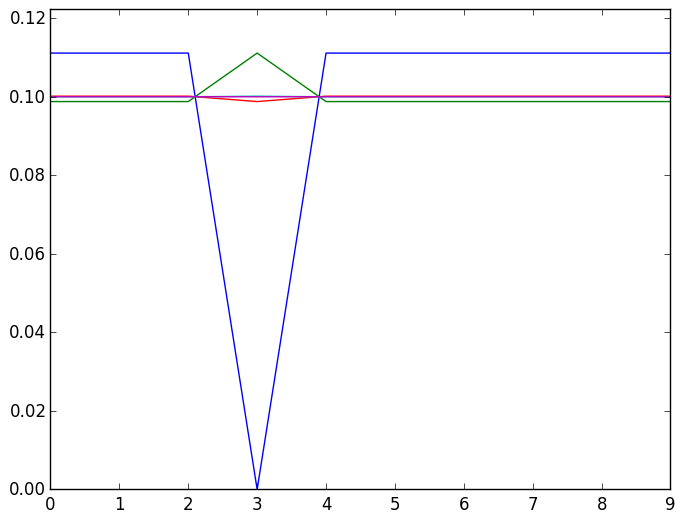

10-element Array{Float64,1}:
 0.100002 
 0.100002 
 0.100002 
 0.0999848
 0.100002 
 0.100002 
 0.100002 
 0.100002 
 0.100002 
 0.100002 

In [184]:
vec=equal_probability(10,5,4)

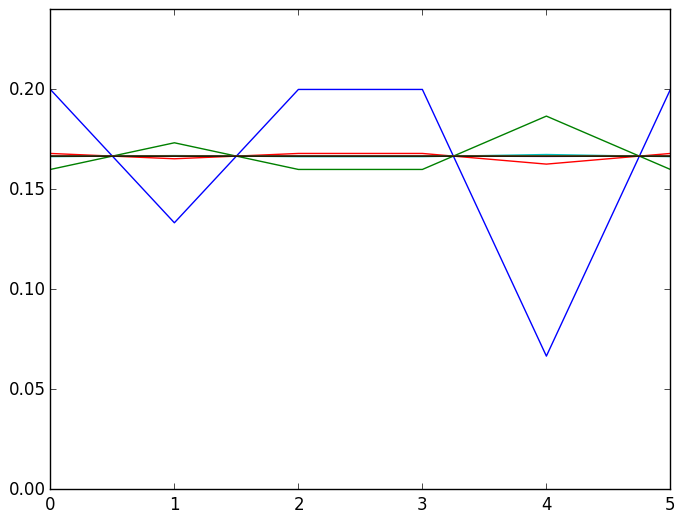

6-element Array{Float64,1}:
 0.166669
 0.166665
 0.166669
 0.166669
 0.16666 
 0.166669

In [185]:
vec=[0,0.333333333,0,0,0.66666666,0]
vec2=equal_probability2(vec,7)

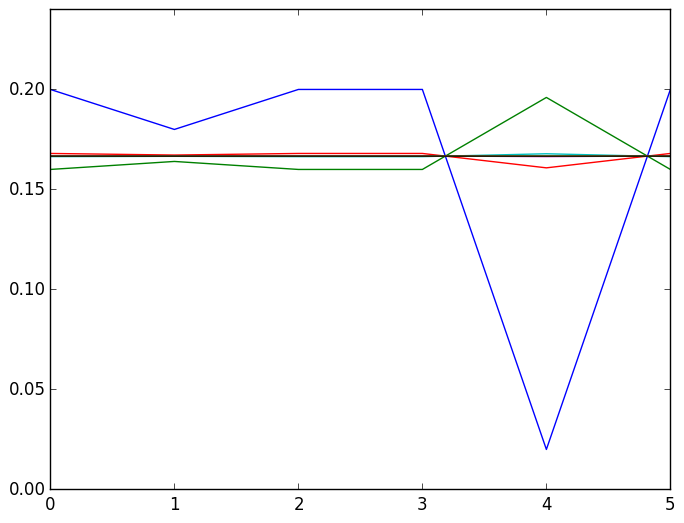

6-element Array{Float64,1}:
 0.166669
 0.166668
 0.166669
 0.166669
 0.166657
 0.166669

In [186]:
vec=[0,0.1,0,0,0.9,0]
vec2=equal_probability2(vec,7)

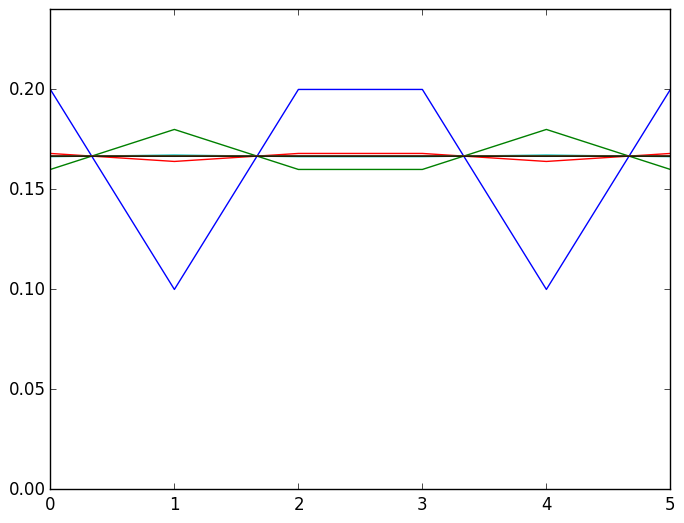

6-element Array{Float64,1}:
 0.166669
 0.166662
 0.166669
 0.166669
 0.166662
 0.166669

In [187]:
vec=[0,0.5,0,0,0.5,0]
vec2=equal_probability2(vec,7)

In [188]:
function equilibrium_time(i_state, precision)
    n_states=length(i_state)
    prob=1./(n_states-1)
    equilibrium=1./n_states
    matrix=zeros(n_states,n_states)
    for i in 1:n_states
        for j in 1:n_states
            if i == j
                matrix[i,j]=0
            else
                matrix[i,j]=1.
            end
        end
    end
    max=1
    min=1
    time=1
    while max >precision && min >precision && time<100
        i_state=prob*matrix*i_state
        max=abs(maximum(i_state)-equilibrium)
        min=abs(minimum(i_state)-equilibrium)
        if max <precision && min <precision
            break
        end
        time+=1
    end
    return time
end

equilibrium_time (generic function with 1 method)

La convergencia es muy rápida para este tipo de procesos. En las siguientes lineas se ve el número de pasos que le toma al sistema, partiendo de un arreglo inicial, en llegar al equilibrio con una cierta precisión fijada. Se puede ver la diferencia en tiempos entre una distribución "picuda" y una que no lo es.

In [189]:
vec1=[0,0.1,0,0,0.9,0]
vec2=[0,0.2,0.3,0,0.3,0.2]
vec3=[0,0,1,0,0,0]
println(equilibrium_time(vec1,0.004))
println(equilibrium_time(vec2,0.004))
println(equilibrium_time(vec3,0.004))

4
3
4


In [190]:
println(equilibrium_time(vec1,0.000004))
println(equilibrium_time(vec2,0.000004))
println(equilibrium_time(vec3,0.000004))

8
7
8


## Método estilo enumeración exacta

Tal como hicimos para un caminante aleatorio, para una cadena de Markov también podemos cambiar de punto de vista y estudiar la evolución de la *distribución de probabilidad*, la cual nos dice la probabilidad de que la cadena se encuentra en cada estado al tiempo $t$.

Primero veamos esto analíticamente.

[4] Supongamos que la cadena empieza en alguna distribución de probabilidad inicial $\mathbf{P}_0 = (P_{0,i}: i=1, \ldots, n)$, donde $n$ es el número de estados.

(i) Escribe la ecuación maestra que describe cómo evoluciona la probabilidad en 1 paso.  

\begin{equation}
\begin{aligned}
P_{1,1}&=(s+q)P_{0,1}+qP_{0,2} \\
P_{1,i}&=sP_{0,i}+pP_{0,i-1}+qP_{0,i+1} \\
P_{1,n}&=(s+p)P_{0,n}+pP_{0,i-1} \\
\end{aligned}
\end{equation}

(ii) Escríbela de nuevo, ahora usando notación matricial.

\begin{equation}
P_{i,j}=\begin{pmatrix}
  r+q & q & \cdots & 0 & 0 \\
  p & r & \cdots & 0 & 0 \\
  \vdots & \vdots & \ddots & \vdots & \vdots \\
  0 & 0 & \cdots & r & q \\
  0 & 0 & \cdots & p & r+p \\
 \end{pmatrix}
 \end{equation}
(ii) ¿Qué pasa en 2 pasos? ¿En $N$ pasos?
\begin{equation}
\begin{pmatrix}
P_{0,1}\\
P_{0,2}\\
\vdots\\
P_{0,n-1}\\
P_{0,n}\\
 \end{pmatrix}=
\begin{pmatrix}
  r+q & q & \cdots & 0 & 0 \\
  p & r & \cdots & 0 & 0 \\
  \vdots & \vdots & \ddots & \vdots & \vdots \\
  0 & 0 & \cdots & r & q \\
  0 & 0 & \cdots & p & r+p \\
 \end{pmatrix}
 \begin{pmatrix}
  r+q & q & \cdots & 0 & 0 \\
  p & r & \cdots & 0 & 0 \\
  \vdots & \vdots & \ddots & \vdots & \vdots \\
  0 & 0 & \cdots & r & q \\
  0 & 0 & \cdots & p & r+p \\
 \end{pmatrix}
  \begin{pmatrix}
P_{0,1}\\
P_{0,2}\\
\vdots\\
P_{0,n-1}\\
P_{0,n}\\
 \end{pmatrix}
 \end{equation}

Para $N$ pasos
\begin{equation}
\begin{pmatrix}
P_{2,1}\\
P_{2,2}\\
\vdots\\
P_{2,n-1}\\
P_{2,n}\\
 \end{pmatrix}=
\begin{pmatrix}
  r+q & q & \cdots & 0 & 0 \\
  p & r & \cdots & 0 & 0 \\
  \vdots & \vdots & \ddots & \vdots & \vdots \\
  0 & 0 & \cdots & r & q \\
  0 & 0 & \cdots & p & r+p \\
 \end{pmatrix}^N
 \begin{pmatrix}
P_{N,1}\\
P_{N,2}\\
\vdots\\
P_{N,n-1}\\
P_{N,n}\\
 \end{pmatrix}
 \end{equation}
 
Si $N>n-2$, la multiplicación de matrices dará como resultado una matriz sin ninguna entrada igual a cero, lo que llevaría a que todas las entradas del sistema tengan alguna probabilidad, sin importar el estado inicial. Ahora, una forma de calcular que sucederá en $N$ pasos, es utilizando una transformación de similaridad pasando de la matriz $M$ a $M=P^{-1}DP$, donde P se conoce como la matriz modal, que es una matriz compuesta por los eigenvectores, y D la matriz diagonal de los eigenvalores.  Utilizando esto, es fácil verificar que se obtiene que $M^N=P^{-1}D^NP$.

[5] Simula la dinámica de la cadena de Markov de la pregunta 2 desde una condición inicial que es una delta en algún estado por un tiempo $t$. ¿Qué observas cuando $t \to \infty$?

Ya realicé esas simulaciones en la primer parte de las notas, por ello, haré mejor la simulación del caso que se discutió anteriormente.

In [193]:
function Random_walk(n_states, steps, position, p=0.5,q=0.5,r=0)
    dl=ones(n_states-1)*p
    d=ones(n_states)*r
    du=ones(n_states-1)*q
    d[1]+=q
    d[n_states]+=p
    M=Tridiagonal(dl,d,du)
    i_state=zeros(n_states)
    i_state[position]=1
    fig=plt.figure()
    title("Caminata Aleatoria: p=$p, q=$q, r=$r")
    plot([1:n_states],i_state)
    i_p=1
    pl=Int64(round(steps/10))
    for t in 1:steps
        i_state=M*i_state
        if t==(pl*i_p)
            plot([1:n_states],i_state,label="Step $t")
            i_p+=1
        end
    end
    plt.legend()
    ylabel("Probabilidad")
    xlabel("Posición")
    return i_state
end

Random_walk (generic function with 4 methods)

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31fc8e0d0>)

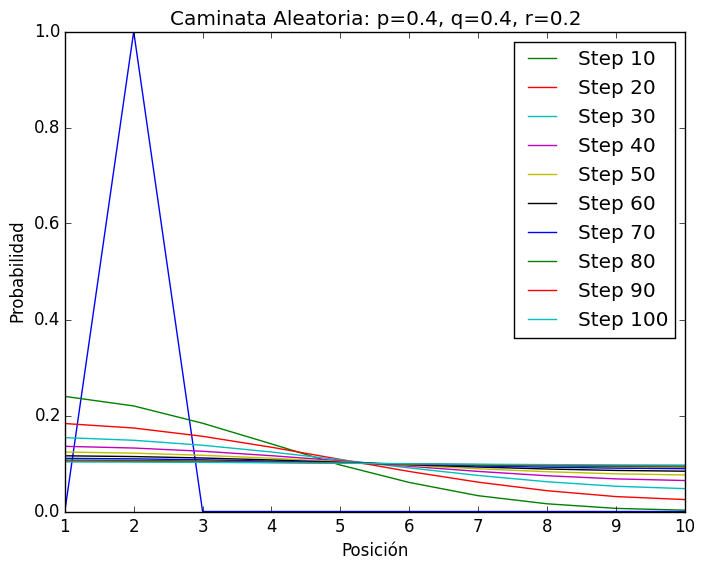

10-element Array{Float64,1}:
 0.103242 
 0.102925 
 0.102321 
 0.10149  
 0.100514 
 0.0994864
 0.0985096
 0.0976787
 0.0970749
 0.0967576

In [194]:
Random_walk(10,100,2,0.4,0.4,0.2)

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31fd08190>)

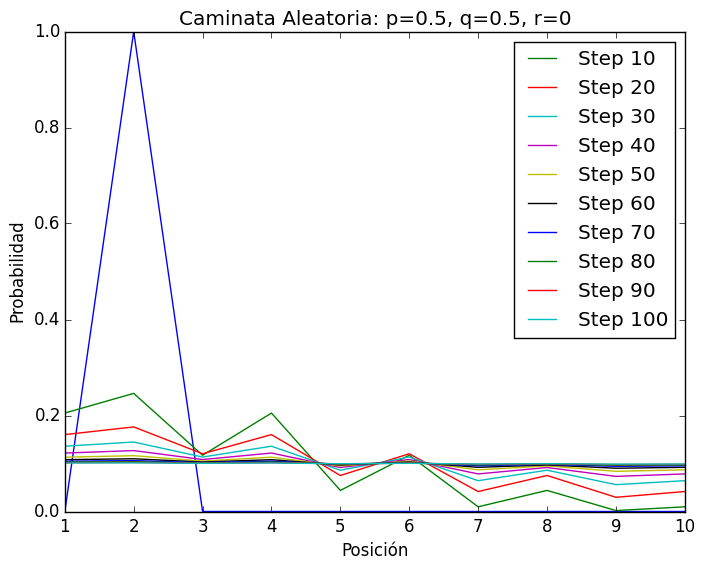

10-element Array{Float64,1}:
 0.101071 
 0.101323 
 0.100409 
 0.101071 
 0.0995911
 0.100409 
 0.0989294
 0.0995911
 0.0986767
 0.0989294

In [195]:
Random_walk(10,100,2)

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31fc59f90>)

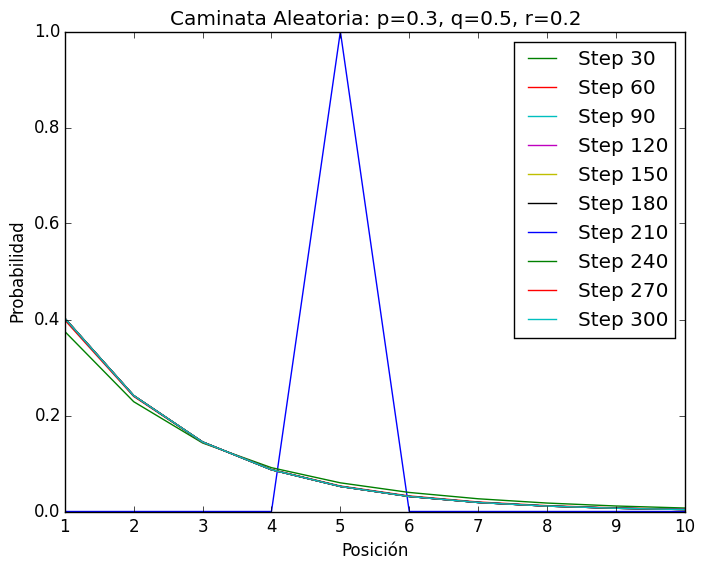

10-element Array{Float64,1}:
 0.402433  
 0.24146   
 0.144876  
 0.0869256 
 0.0521554 
 0.0312932 
 0.0187759 
 0.0112656 
 0.00675934
 0.0040556 

In [196]:
Random_walk(10,300,5,0.3,0.5,0.2)

[6] Este mismo fenómeno (lo que pasa cuando $t \to \infty$) ocurre para "casi todas" las cadenas de Markov (cuando se satisfacen ciertas condiciones técnicas). Explícalo usando propiedades de la matriz que vieron en álgebra lineal. ¿A qué corresponde lo que pasa cuando $t \to \infty$?

Ahora, cuando $N \rightarrow \infty$, la matriz diagonal, con los eigenvalores se irá a cero, exceptuando la entrada con eigenvalor 1, ya que $\lambda_n\leq1$. Se pueden ver unos ejemplos concretos, usando SymPy, en el apéndice al final de las notas. Con ello se obtiene que
\begin{equation}
\lim_{N\rightarrow \infty}M^N=P^{-1}\begin{pmatrix}
  0 & 0 & \cdots & 0 & 0 \\
  0 & 0 & \cdots & 0 & 0 \\
  \vdots & \vdots & \ddots & \vdots & \vdots \\
  0 & 0 & \cdots & 0 & 0 \\
  0 & 0 & \cdots & 0 & 1 \\
 \end{pmatrix}P
\end{equation}
es decir, que el eigenvector de ese eigenvalor será el que predominará y se mantendrá. Dicho eigenvector es de la forma 
\begin{equation}
P_{\infty}=\left(\left(\frac{p}{q}\right)^{n-1},\left(\frac{p}{q}\right)^{n-2},\cdots, \frac{p}{q},1\right)
\end{equation}
Para el caso más sencillo, i.e., cuando l probabilidad de saltar a la derecha o a la izquierda es la misma, la matriz $P_{i,j}$ se vuelve una matriz simétrica, y por lo tanto hermitiana, por lo que todos sus aigenvalores serán reales. Además vemos que, una vez normalizado para que la suma de sus entradas de uno, el eigenvector de $\lambda=1$ se reduce a 
\begin{equation}
P_{\infty}=\frac{1}{n}\left(1,1,\cdots,1,1\right)
\end{equation}
Es decir, será igualmente probable hallarlo en cualquier posición del sistema.

En cuanto al sistema del ejercicio [2]
\begin{equation}
P_{i,j}=\frac{1}{3}\begin{pmatrix}
  0 & 1 & 1 & 1 \\
  1 & 0 & 1 & 1 \\
  1 & 1 & 0 & 1 \\
  1 & 1 & 1 & 0 \\
 \end{pmatrix}
 \end{equation}
 sus eigenvalores son (-1/3,-1/3,-1/3,1), para los cuales, los primeros 3 llevan a eigenvectores que no tienen sentido físico, por lo que únicamente el eigenvalor $\lambda=1$, que lleva a $P=\frac{1}{3}(1,1,1)$, sobrevivirá (además de que  cuanto $N\rightarrow \infty$ sólo esa entrada no se irá a cero)una vez normalizado para la probabilidad. Nuevamente, cuando $N\rightarrow \infty$, el estado que se alcanzará será
\begin{equation}
 P=\frac{1}{3}(1,1,1)
\end{equation}
es decir, a un sistema en el que sea igualmente probable hallarse en cualquiera de las posiciones.

#Apéndice

In [101]:
p = Sym("p")
q = Sym("q")
r = Sym("r")
M = [r+q q 0 0; p r q 0  ;0 p r q; 0 0 p r+p]
#M = [r+q q ;p r+p]
println(diagonalize(M))
#println(eigvals(M))
#println(eigvecs(M))

(

[                                                    3]
[ q            -q                     -q            q ]
[ -            ---                    ---           --]
[ p             p                      p             3]
[                                                   p ]
[                                                     ]
[             ___   _____            ___   _____     2]
[-q     q + \/ 2 *\/ p*q       q - \/ 2 *\/ p*q     q ]
[---    -----------------      -----------------    --]
[ p             p                      p             2]
[                                                   p ]
[                                                     ]
[      /      ___   _____\    /      ___   _____\     ]
[     -\p + \/ 2 *\/ p*q /   -\p - \/ 2 *\/ p*q /   q ]
[-1   ---------------------  ---------------------  - ]
[               p                      p            p ]
[                                                     ]
[ 1             1                      1     

In [19]:
p = Sym("p")
q = Sym("q")
r = Sym("r")
M = [r+q q 0 ; p r q; 0 p r+p]
println(M)
println(diagonalize(M))
#println(det(M))


[q + r  q    0  ]
[               ]
[  p    r    q  ]
[               ]
[  0    p  p + r]
(

[                               2]
[       q             -q       q ]
[    -------        -------    --]
[      _____          _____     2]
[    \/ p*q         \/ p*q     p ]
[                                ]
[ /      _____\         _____    ]
[-\q + \/ p*q /   q - \/ p*q   q ]
[---------------  -----------  - ]
[      _____          _____    p ]
[    \/ p*q         \/ p*q       ]
[                                ]
[       1              1       1 ],


[      _____                        ]
[r - \/ p*q        0           0    ]
[                                   ]
[                   _____           ]
[     0       r + \/ p*q       0    ]
[                                   ]
[     0            0       p + q + r])


In [20]:
p = Sym("p")
q = Sym("q")
r = Sym("r")
#M = [r+q q 0 0; p r q 0  ;0 p r q; 0 0 p r+p]
M = [r+q q ;p r+p]
println(diagonalize(M))
P,D=diagonalize(M)
PI=inverse(P)
#F=P*D^1*PI
#println(eigvals(M))
#println(eigvecs(M))

(

[        -2*q                     2*q         ]
[----------------------  ---------------------]
[            __________             __________]
[           /        2             /        2 ]
[-p + q + \/  (p + q)    p - q + \/  (p + q)  ]
[                                             ]
[          1                       1          ],


[               __________                           ]
[              /        2                            ]
[p   q       \/  (p + q)                             ]
[- + - + r - -------------              0            ]
[2   2             2                                 ]
[                                                    ]
[                                          __________]
[                                         /        2 ]
[                           p   q       \/  (p + q)  ]
[            0              - + - + r + -------------]
[                           2   2             2      ])


2x2 Array{SymPy.Sym,2}
[                        2                                                 ]
[/            __________\                __________              __________]
[|           /        2 |               /        2              /        2 ]
[\-p + q + \/  (p + q)  /    -p + q + \/  (p + q)    -p + q + \/  (p + q)  ]
[------------------------- - ----------------------  ----------------------]
[           __________                2*q                    __________    ]
[          /        2                                       /        2     ]
[    4*q*\/  (p + q)                                    2*\/  (p + q)      ]
[                                                                          ]
[ /            __________\ /           __________\              __________ ]
[ |           /        2 | |          /        2 |             /        2  ]
[ \-p + q + \/  (p + q)  /*\p - q + \/  (p + q)  /   p - q + \/  (p + q)   ]
[ ------------------------------------------------   

In [214]:
M = [0 1 1 1; 1 0 1 1; 1 1 0 1; 1 1 1 0 ]
println(eigvals(M))
eigvecs(M)


[-1.0,-0.9999999999999999,-0.9999999999999996,3.0]


4x4 Array{Float64,2}:
  0.707107  -0.408248  -0.288675  -0.5
 -0.707107  -0.408248  -0.288675  -0.5
  0.0        0.816497  -0.288675  -0.5
  0.0        0.0        0.866025  -0.5

In [3]:
p = Sym("p")
M = [0 p p p ; p 0 p p; p p 0 p; p p p 0]
println(diagonalize(M))

(

[-1  -1  -1  1]
[             ]
[1   0   0   1]
[             ]
[0   1   0   1]
[             ]
[0   0   1   1],


[-p  0   0    0 ]
[               ]
[0   -p  0    0 ]
[               ]
[0   0   -p   0 ]
[               ]
[0   0   0   3*p])
